In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Charger le fichier Excel

In [2]:

df_emissions = pd.read_excel("D:\\smartCyties\\tutoriel 1\\output.xlsx", sheet_name="Emissions")
df_pollution = pd.read_excel("D:\\smartCyties\\tutoriel 1\\output.xlsx", sheet_name="Pollution")
df_queue = pd.read_excel("D:\\smartCyties\\tutoriel 1\\output.xlsx", sheet_name="Queue")

In [3]:
df_emissions.head(5)

,id,eclass,CO2,CO,HC,NOx,PMx,fuel,electricity,noise,...,type,waiting,lane,pos,speed,angle,x,y,run,time
0,f1.0,HBEFA3/PC_G_EU4,2624.72,164.78,0.81,1.20,0.07,837.22,0.0,55.94,...,car,0.0,edge1_0,5.10,0.00,90.0,5.10,-1.6,1,0.0
1,f1.0,HBEFA3/PC_G_EU4,4097.93,152.03,0.79,1.83,0.09,1307.09,0.0,68.37,...,car,0.0,edge1_0,7.70,2.60,90.0,7.70,-1.6,1,1.0
2,f1.0,HBEFA3/PC_G_EU4,4925.05,137.04,0.74,2.16,0.10,1570.88,0.0,67.52,...,car,0.0,edge1_0,12.49,4.79,90.0,12.49,-1.6,1,2.0
3,f1.0,HBEFA3/PC_G_EU4,4953.24,115.79,0.64,2.13,0.10,1579.87,0.0,66.07,...,car,0.0,edge1_0,18.96,6.47,90.0,18.96,-1.6,1,3.0
4,f1.1,HBEFA3/PC_G_EU4,2624.72,164.78,0.81,1.20,0.07,837.22,0.0,55.94,...,car,0.0,edge1_0,5.10,0.00,90.0,5.10,-1.6,1,3.0


In [5]:
df_pollution.head(5)

,begin,end,id,sampledSeconds,nVehEntered,nVehLeft,nVehSeen,meanSpeed,meanTimeLoss,meanOccupancy,...,meanHaltingDuration,maxHaltingDuration,haltingDurationSum,meanIntervalHaltingDuration,maxIntervalHaltingDuration,intervalHaltingDurationSum,startedHalts,meanVehicleNumber,maxVehicleNumber,run
0,0.0,1.0,pollution_detector,0.0,0,0,0,-1.0,-1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
1,1.0,2.0,pollution_detector,0.0,0,0,0,-1.0,-1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
2,2.0,3.0,pollution_detector,0.0,0,0,0,-1.0,-1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
3,3.0,4.0,pollution_detector,0.0,0,0,0,-1.0,-1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
4,4.0,5.0,pollution_detector,0.0,0,0,0,-1.0,-1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1


In [6]:
df_queue.head(5)

,begin,end,id,nVehContrib,flow,occupancy,speed,harmonicMeanSpeed,length,nVehEntered,run
0,0.0,1.0,queue_detector_edge1,0,0.0,0.0,-1.0,-1.0,-1.0,0,1
1,1.0,2.0,queue_detector_edge1,0,0.0,0.0,-1.0,-1.0,-1.0,0,1
2,2.0,3.0,queue_detector_edge1,0,0.0,0.0,-1.0,-1.0,-1.0,0,1
3,3.0,4.0,queue_detector_edge1,0,0.0,0.0,-1.0,-1.0,-1.0,0,1
4,4.0,5.0,queue_detector_edge1,0,0.0,0.0,-1.0,-1.0,-1.0,0,1


# Convertir certaines colonnes

In [13]:

df_emissions["time"] = pd.to_numeric(df_emissions["time"])
df_emissions["CO2"] = pd.to_numeric(df_emissions["CO2"], errors="coerce")
df_emissions["fuel"] = pd.to_numeric(df_emissions["fuel"], errors="coerce")
df_emissions["run"] = df_emissions["run"].astype(int)

df_queue["time"] = pd.to_numeric(df_queue["begin"])
df_queue["length"] = pd.to_numeric(df_queue["length"], errors="coerce")
df_queue["run"] = df_queue["run"].astype(int)

# la correlation entre la longueur de la fille d'attente et la pollution

In [29]:

# Agréger les émissions de CO2 par time et run (en les sommant par timestep)
df_emissions_agg = df_emissions.groupby(["run", "time"])["CO2"].sum().reset_index()

# Agréger les longueurs de file d’attente par time et run (moyenne ou somme possible)
df_queue_agg = df_queue.groupby(["run", "time"])["length"].mean().reset_index()

# 🔗 Fusionner les deux sur run et time
df_merged = pd.merge(df_emissions_agg, df_queue_agg, on=["run", "time"])
df_merged1 = pd.merge(df_emissions, df_queue, on=["run", "time"])
correlation, _ = pearsonr(df_merged1["length"],df_merged1["CO2"])
                          
print(f"La corrélation est : {correlation:.2f}")

La corrélation est : 0.03


# Visualiser la relation entre CO2 et la longueur de file d'attente

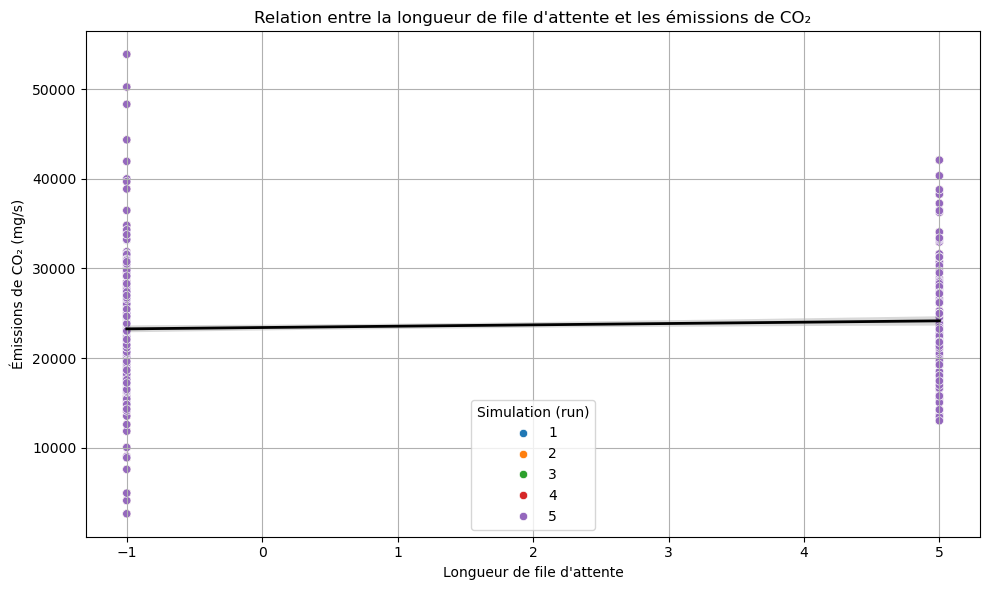

In [16]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_merged, x="length", y="CO2", hue="run", palette="tab10")
sns.regplot(data=df_merged, x="length", y="CO2", scatter=False, color="black", line_kws={"linewidth": 2})

plt.title("Relation entre la longueur de file d'attente et les émissions de CO₂")
plt.xlabel("Longueur de file d'attente")
plt.ylabel("Émissions de CO₂ (mg/s)")
plt.legend(title="Simulation (run)")
plt.grid(True)
plt.tight_layout()
plt.show()

#  1. CO2 par timestep pour chaque simulation

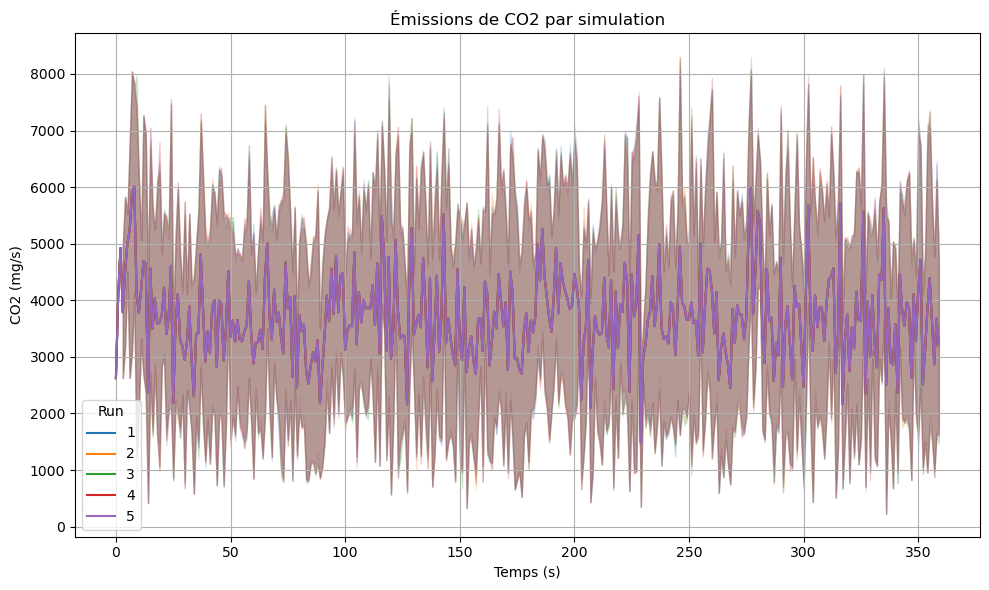

In [8]:

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_emissions, x="time", y="CO2", hue="run", palette="tab10")
plt.title("Émissions de CO2 par simulation")
plt.xlabel("Temps (s)")
plt.ylabel("CO2 (mg/s)")
plt.legend(title="Run")
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Carburant utilisé par véhicule par simulation

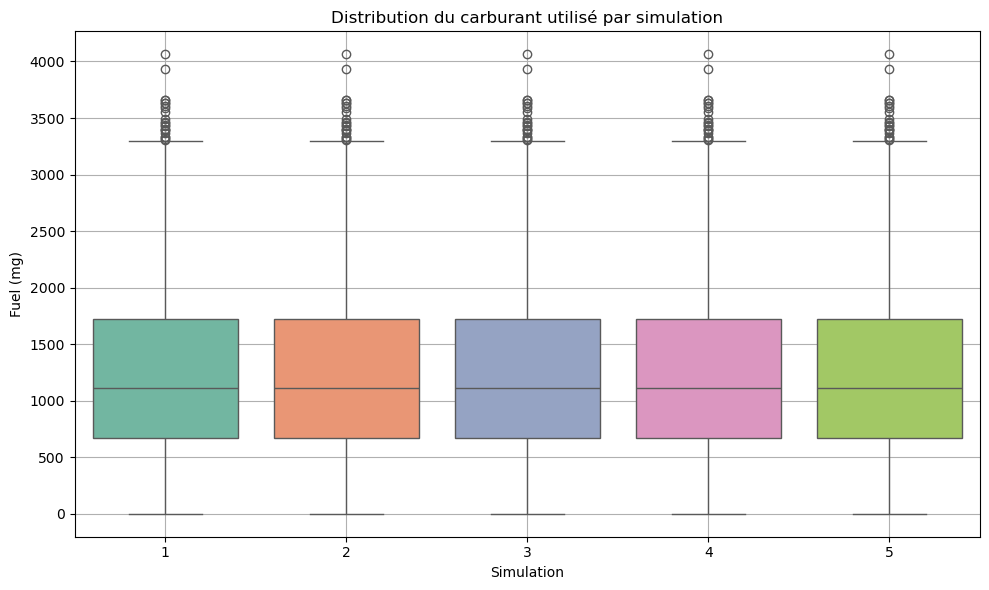

In [13]:

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_emissions, x="run", y="fuel", hue="run", palette="Set2", legend=False)
plt.title("Distribution du carburant utilisé par simulation")
plt.xlabel("Simulation")
plt.ylabel("Fuel (mg)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Pollution : vitesse moyenne par intervalle

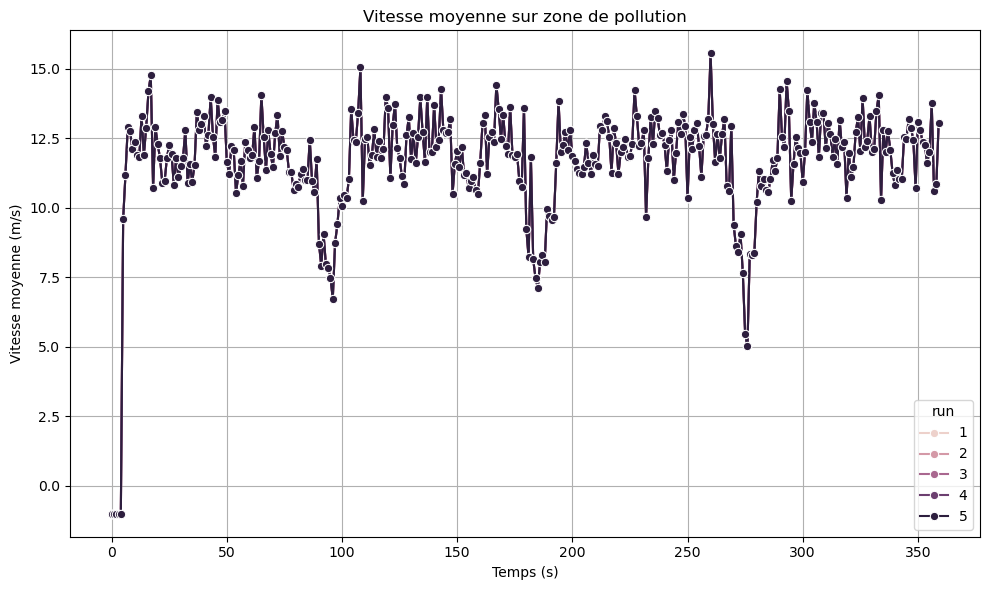

In [11]:

df_pollution["meanSpeed"] = pd.to_numeric(df_pollution["meanSpeed"], errors="coerce")
df_pollution["begin"] = pd.to_numeric(df_pollution["begin"], errors="coerce")

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_pollution, x="begin", y="meanSpeed", hue="run", marker="o")
plt.title("Vitesse moyenne sur zone de pollution")
plt.xlabel("Temps (s)")
plt.ylabel("Vitesse moyenne (m/s)")
plt.grid(True)
plt.tight_layout()
plt.show()

#  Queue detector : flux détecté

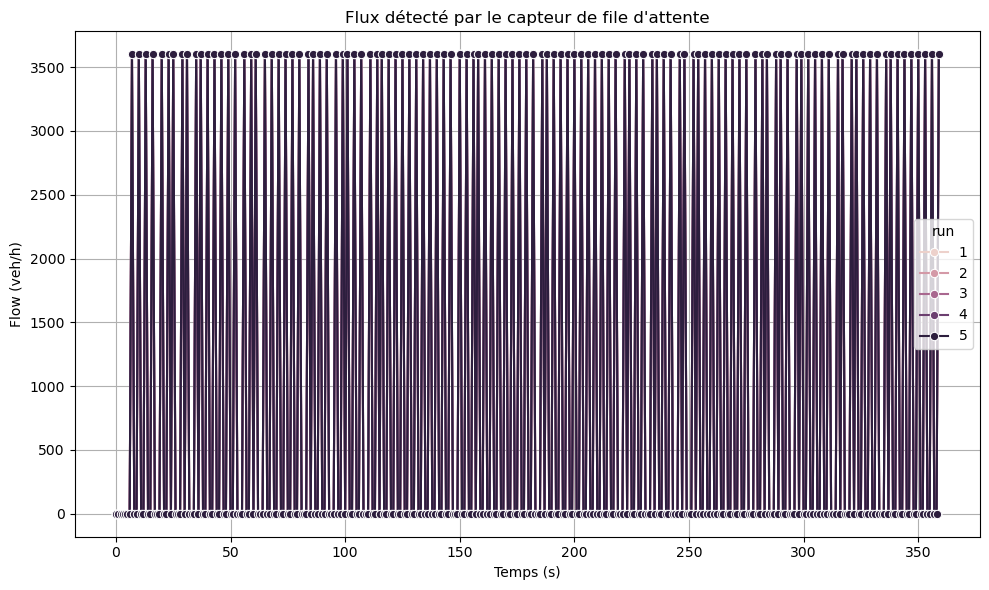

In [12]:

df_queue["flow"] = pd.to_numeric(df_queue["flow"], errors="coerce")
df_queue["begin"] = pd.to_numeric(df_queue["begin"], errors="coerce")

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_queue, x="begin", y="flow", hue="run", marker="o")
plt.title("Flux détecté par le capteur de file d'attente")
plt.xlabel("Temps (s)")
plt.ylabel("Flow (veh/h)")
plt.grid(True)
plt.tight_layout()
plt.show()

#Relation entre le nombre de véhicules vus et les émissions de CO2

In [17]:

df_pollution["time"] = pd.to_numeric(df_pollution["begin"])  # le début de l’intervalle
df_pollution["nVehSeen"] = pd.to_numeric(df_pollution["nVehSeen"], errors="coerce")
df_pollution["run"] = df_pollution["run"].astype(int)

# Fusionner sur time et run
df_merged = pd.merge(df_emissions, df_pollution, on=["time", "run"])

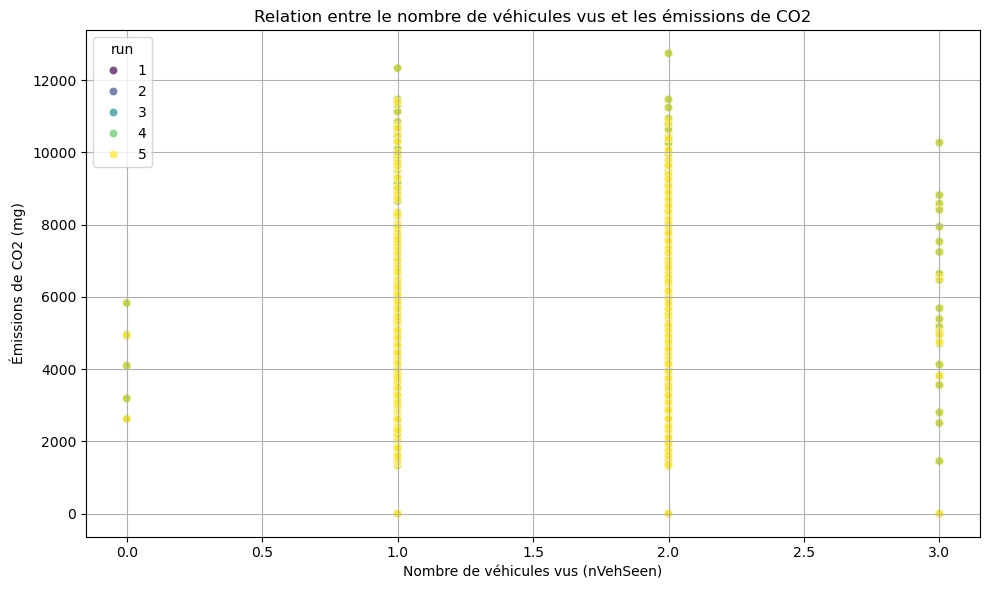

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_merged, x="nVehSeen", y="CO2", hue="run", palette="viridis", alpha=0.7)
plt.title("Relation entre le nombre de véhicules vus et les émissions de CO2")
plt.xlabel("Nombre de véhicules vus (nVehSeen)")
plt.ylabel("Émissions de CO2 (mg)")
plt.grid(True)
plt.tight_layout()
plt.show()